In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
AUC_nut=[0.7252,0.7999,0.8206,0.8025]
AUC_rec=[0.9362,0.9748 ,0.9812,0.9752]
AUC_lew=[0.8806,0.9306,0.9474,0.9435]

Sen_nut=[0.6665,0.7192,0.7394,0.7253]
Sen_rec=[0.8647,0.9302,0.9392,0.9279 ]
Sen_lew=[0.8041,0.8444,0.8764,0.8710]

Spe_nut=[0.6666,0.7291,0.7394,0.7253]
Spe_rec=[0.8655,0.9484,0.9397,0.9291]
Spe_lew=[0.8048,0.8957,0.8771,0.8715]

# Thr_nut=[0.2954,0.3204,0.3351,0.3328]
# Thr_rec=[0.0169,0.0270,0.0192 ,0.0193]
# Thr_lew=[0.0159,0.0180,0.0122 ,0.0158]

In [3]:
AUC_nut_sd=[0.0019,0.0007,0.0013,0.0009]
AUC_rec_sd=[0.0025,0.0032,0.0020,0.0020]
AUC_lew_sd=[0.0026,0.0038,0.0028,0.0028]

Sen_nut_sd=[0.0013,0.0026,0.0012,0.0011]
Sen_rec_sd=[0.0027,0.0019,0.0073,0.0023]
Sen_lew_sd=[0.0031,0.0061,0.0048,0.0051]

Spe_nut_sd=[0.0013,0.0019,0.0012,0.0011]
Spe_rec_sd=[0.0033,0.0022,0.0074,0.0029]
Spe_lew_sd=[0.0029,0.0088,0.0049,0.0051]

# Thr_nut_sd=[0.0008,0.0016,0.0017,0.0032]
# Thr_rec_sd=[0.0004,0.0024,0.0244,0.0035]
# Thr_lew_sd=[0.0004,0.0024,0.0021,0.0027]

In [4]:
col_names=['Logistic Regression','Random Forest', 'XGBoost','Multi-layer Perceptron']
species=["Nuttall's Woodpecker","Red-cockaded Woodpecker","Lewis's Woodpecker"]

In [5]:
ls=[[AUC_nut,AUC_rec,AUC_lew],
    [Sen_nut,Sen_rec,Sen_lew],
    [Spe_nut,Spe_rec,Spe_lew],
   # [Thr_nut,Thr_rec,Thr_lew]
   ]

ls_sd=[[AUC_nut_sd,AUC_rec_sd,AUC_lew_sd],
    [Sen_nut_sd,Sen_rec_sd,Sen_lew_sd],
    [Spe_nut_sd,Spe_rec_sd,Spe_lew_sd],
   # [Thr_nut_sd,Thr_rec_sd,Thr_lew_sd]
   ]

In [6]:
numpy_array = np.array(ls)
transpose = numpy_array.T
transpose_list = transpose.tolist()

numpy_array = np.array(ls_sd)
transpose = numpy_array.T
transpose_list_sd = transpose.tolist()

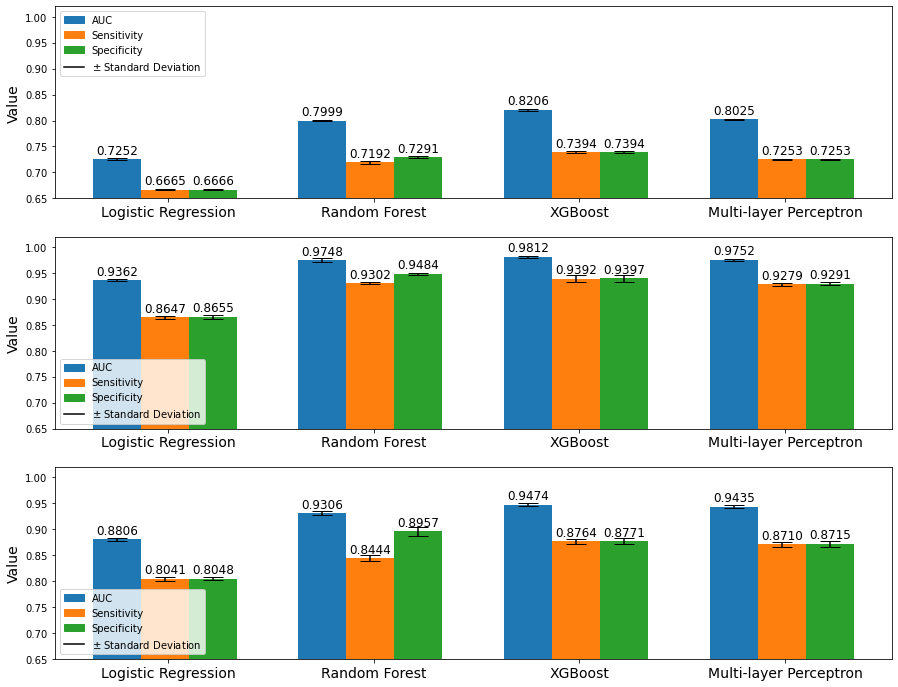

In [7]:
import matplotlib.lines as mlines
x = np.arange(len(col_names))  # the label locations
width = 0.7  # the width of the bars

AUC_patch = mpatches.Patch(color='C0', label='AUC')
Sen_patch = mpatches.Patch(color='C1', label='Sensitivity')
Spe_patch = mpatches.Patch(color='C2', label='Specificity')
Err_patch = mlines.Line2D([], [], color='black', label='$\pm$ Standard Deviation')

fig, axes=plt.subplots(3,figsize=(15,12))
for j,(l,l_sd) in enumerate(zip(ls,ls_sd)):
    for i,(val,val_sd,name) in enumerate(zip(l,l_sd,species)):
        for index, (value,value_sd) in enumerate(zip(val,val_sd)):
            axes[i].text((x + width/3*j-0.1)[index],value+0.01, str(value).ljust(6, '0'),size=12)

        rects2 = axes[i].bar(x + width/3*j, val, width/3,yerr=val_sd,capsize=10)
        axes[i].set_xticks([0.25,1.25,2.25,3.25])
        axes[i].set_xticklabels(col_names,size=14)
        axes[i].set_ylim(0.65,1.02)
        axes[i].set_ylabel("Value",size=14)
        if i==0:
            axes[i].legend(handles=[AUC_patch, Sen_patch,Spe_patch,Err_patch],loc='upper left')
        if i==1:
            axes[i].legend(handles=[AUC_patch, Sen_patch,Spe_patch,Err_patch],loc='lower left')
        if i==2:
            axes[i].legend(handles=[AUC_patch, Sen_patch,Spe_patch,Err_patch],loc='lower left')

fig.savefig(f'comparison.png',bbox_inches='tight')
plt.show()